In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from personality.constants import DATA_PATH

In [2]:
# PATH = f"{DATA_PATH}/robustness/llama-3.1-8b-it"

# f1 = pd.read_json(f"{PATH}/f1.jsonl", orient="records", lines=True)
# acc = pd.read_json(f"{PATH}/acc.jsonl", orient="records", lines=True)

# # Filter data to only include modernbert-base-classifier
# filtered_f1 = f1[~f1["variant"].isin(["default", "all"])]

# # Create the violin plot
# plt.figure(figsize=(10, 6))
# methods = ['prompted', 'steered', 'trained_distillation', 'trained_introspection']
# method_labels = ['System Prompt', 'Activation Steering', 'Distill', 'Distill+Introspect']
# data_for_violinplot = [filtered_f1[filtered_f1['method'] == method]['score'] for method in methods]
# colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcoral']

# violin_parts = plt.violinplot(data_for_violinplot, positions=range(1, len(methods) + 1), showextrema=True, showmedians=True)

# # Color each violin with different colors
# for i, pc in enumerate(violin_parts['bodies']):
#     pc.set_facecolor(colors[i])
#     pc.set_alpha(0.7)

# # Add individual points with jitter
# import numpy as np
# for i, method in enumerate(methods):
#     method_data = filtered_f1[filtered_f1['method'] == method]['score']
#     x_position = i + 1
#     # Add random jitter to x-axis for better visibility
#     x_jitter = np.random.normal(0, 0.04, size=len(method_data))
#     plt.scatter(x_position + x_jitter, method_data, alpha=0.6, s=30, color='darkblue', edgecolors='white', linewidth=0.5)

# plt.ylim(0, 1.05)
# plt.xticks(range(1, len(methods) + 1), method_labels, fontsize=14)
# plt.xlabel('Method of Altering Persona', fontsize=14)
# plt.ylabel('F1 Score', fontsize=14)
# plt.title('Performance of a Persona-Classifier Under Adversarial Prompting\nLlama 3.1 8B', fontsize=16)
# plt.grid(True, alpha=0.3)
# plt.tick_params(axis='y', labelsize=12)
# plt.show()

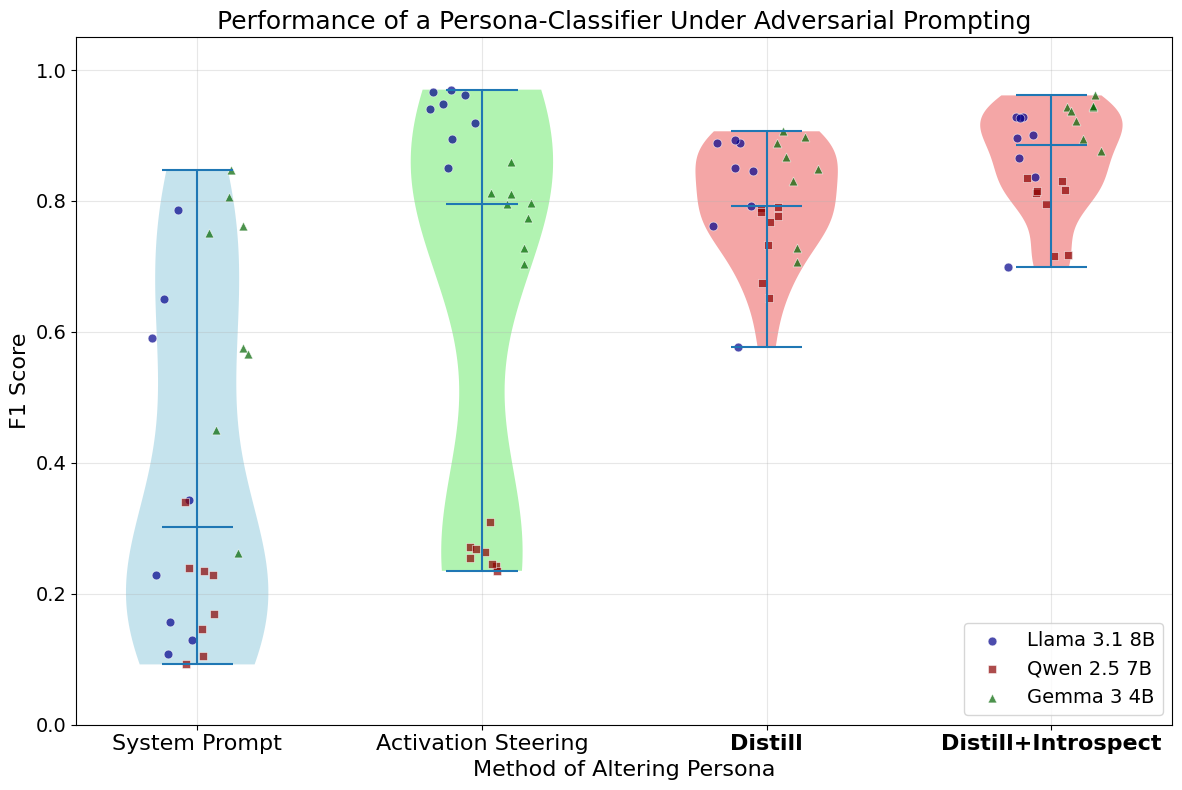

In [3]:
# Combined plot merging results from Llama and Qwen and Gemma
plt.figure(figsize=(12, 8))

# Load data for all three models
PATH_LLAMA = f"{DATA_PATH}/robustness/llama-3.1-8b-it"
f1_llama = pd.read_json(f"{PATH_LLAMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_llama = f1_llama[~f1_llama["variant"].isin(["default", "all"])]

PATH_QWEN = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"
f1_qwen = pd.read_json(f"{PATH_QWEN}/f1.jsonl", orient="records", lines=True)
filtered_f1_qwen = f1_qwen[~f1_qwen["variant"].isin(["default", "all"])]

PATH_GEMMA = f"{DATA_PATH}/robustness/gemma-3-4b-it"
f1_gemma = pd.read_json(f"{PATH_GEMMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_gemma = f1_gemma[~f1_gemma["variant"].isin(["default", "all"])]

# Combine data from all three models
combined_f1 = pd.concat([filtered_f1_llama, filtered_f1_qwen, filtered_f1_gemma], ignore_index=True)

methods = ['prompted', 'steered', 'trained_distillation', 'trained_introspection']
method_labels = ['System Prompt', 'Activation Steering', 'Distill', 'Distill+Introspect']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcoral']

# Create violin plot with combined data
data_for_violinplot = [combined_f1[combined_f1['method'] == method]['score'] for method in methods]
violin_parts = plt.violinplot(data_for_violinplot, positions=range(1, len(methods) + 1), showextrema=True, showmedians=True)

# Color each violin
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Add individual points with jitter, using different markers for each model
for i, method in enumerate(methods):
    # Llama data points
    method_data_llama = filtered_f1_llama[filtered_f1_llama['method'] == method]['score']
    x_position = i + 1
    x_jitter_llama = np.random.normal(-0.12, 0.04, size=len(method_data_llama))
    plt.scatter(x_position + x_jitter_llama, method_data_llama, alpha=0.7, s=40, 
               color='darkblue', edgecolors='white', linewidth=0.5, marker='o', label='Llama 3.1 8B' if i == 0 else "")
    
    # Qwen data points
    method_data_qwen = filtered_f1_qwen[filtered_f1_qwen['method'] == method]['score']
    x_jitter_qwen = np.random.normal(0, 0.04, size=len(method_data_qwen))
    plt.scatter(x_position + x_jitter_qwen, method_data_qwen, alpha=0.7, s=40, 
               color='darkred', edgecolors='white', linewidth=0.5, marker='s', label='Qwen 2.5 7B' if i == 0 else "")
    
    # Gemma data points
    method_data_gemma = filtered_f1_gemma[filtered_f1_gemma['method'] == method]['score']
    x_jitter_gemma = np.random.normal(0.12, 0.04, size=len(method_data_gemma))
    plt.scatter(x_position + x_jitter_gemma, method_data_gemma, alpha=0.7, s=40, 
               color='darkgreen', edgecolors='white', linewidth=0.5, marker='^', label='Gemma 3 4B' if i == 0 else "")

plt.ylim(0, 1.05)

# Set x-tick labels with bold formatting for Distill and Distill+Introspect
ax = plt.gca()
ax.set_xticks(range(1, len(methods) + 1))
xtick_labels = []
for i, label in enumerate(method_labels):
    if i >= 2:  # Distill and Distill+Introspect
        xtick_labels.append(label)
    else:
        xtick_labels.append(label)

ax.set_xticklabels(xtick_labels, fontsize=16)
# Make the last two labels bold
for i, label in enumerate(ax.get_xticklabels()):
    if i >= 2:  # Distill and Distill+Introspect
        label.set_fontweight('bold')

plt.xlabel('Method of Altering Persona', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
plt.title('Performance of a Persona-Classifier Under Adversarial Prompting', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='y', labelsize=14)
plt.legend(fontsize=14, loc='lower right')
plt.tight_layout()
plt.savefig("/workspace/PersonalityTraining/figures/robustness.png", dpi=400)
plt.show()